The random variable X is the uniformly distributed pointer position:

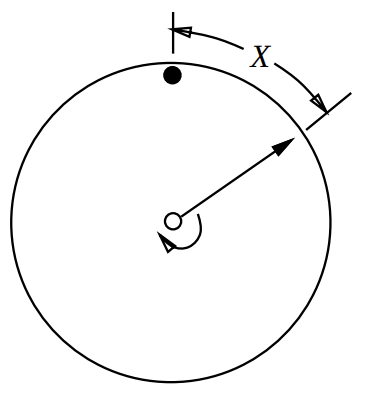

$$f_{X|B}(x) = 
\begin{cases} 
\frac{f_X(x)}{P[B]} & x \in B, \\ 
0 & \text{otherwise}.
\end{cases}$$

$$ f_{X|B}(x) \, dx = P[x < X \leq x + dx \mid B] = \frac{P[x < X \leq x + dx, B]}{P[B]} $$

$$P[A|B] = \frac{P[AB]}{P[B]} =\frac{P[A,B]}{P[B]}= \frac{P[A\bigcap B]}{P[B]}$$

$$\frac{P[x < X \leq x + dx, B]}{P[B]} = \frac{P[x < X \leq x + dx \bigcap B]}{P[B]}$$

$$\frac{P[X \leq x + dx] - P[X < x] \bigcap B]}{P[B]}$$

In [45]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [73]:
from sympy import Piecewise, lambdify, simplify
from sympy import oo, Symbol, integrate, symbols
import numpy as np
import matplotlib.pyplot as plt
from sympy.abc import x, y, t, w
x1 = Piecewise((0, x<0), (1, (x>=0) & (x<1)), (0, x>=1))
x1
fx = lambdify(x, x1)

Piecewise((0, x < 0), (1, x < 1), (0, True))

In [25]:
fx(1)

array(0.)

Text(0.5, 0, 'x')

Text(0, 0.5, 'f(x)')

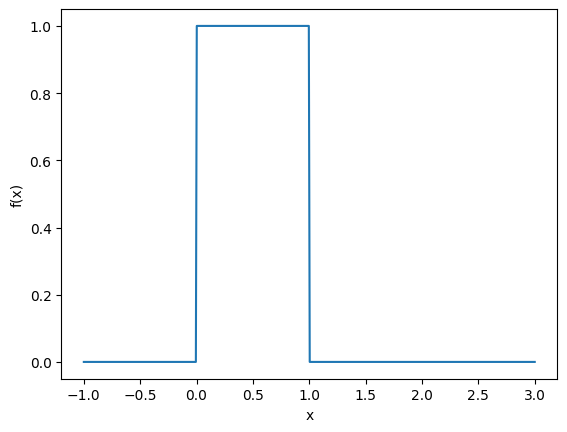

In [92]:
x_vals = np.linspace(-1, 3,500)
y_vals = fx(x_vals)
fig, ax = plt.subplots(subplot_kw={'title':''})
ax.plot(x_vals, y_vals)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')


In [89]:
def convolve(f, g, t, lower_limit=-oo, upper_limit=oo):
    tau = Symbol('__very_unlikely_name__', real=True)
    return integrate(f.subs(t, tau) * g.subs(t, t - tau), 
                     (tau, lower_limit, upper_limit))

-Max(0, Min(x, x - 1)) + Min(Max(0, x), Max(1, x - 1))

0.500000000000000

Text(0.5, 0, 'x')

Text(0, 0.5, 'f(x)')

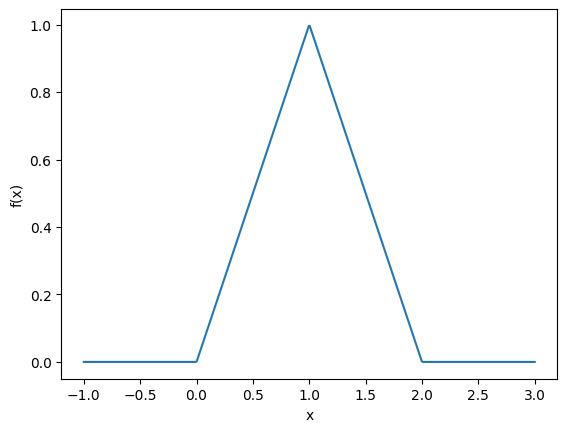

In [93]:
ans = convolve(x1, x1, x)#, lower_limit=0, upper_limit=1)
ans
ans.subs({x:.5})
fx_conv = lambdify(x, ans)
fx_conv_vec = np.vectorize(fx_conv)
y_vals = fx_conv_vec(x_vals)
fig, ax = plt.subplots(subplot_kw={'title':''})
ax.plot(x_vals, y_vals)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')

$$\sigma_{t} = \sigma_{11} = \sigma_{22} = \frac{Pr}{2t} =\frac{Fr}{A2t}=\frac{Fr}{\pi\cdot R^22t}$$
$$N_{rr} = \sigma_t t$$
$$c = \sqrt{\frac{N_{rr}^{r}}{\rho t}} =\sqrt{\frac{N_{rr}^{r}}{\rho t}} $$

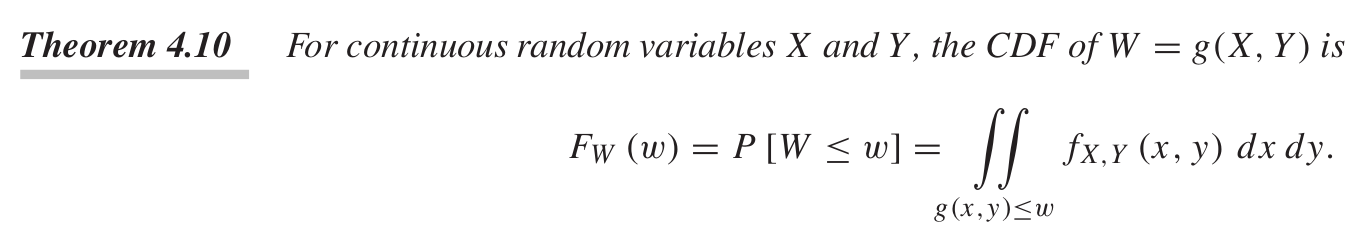
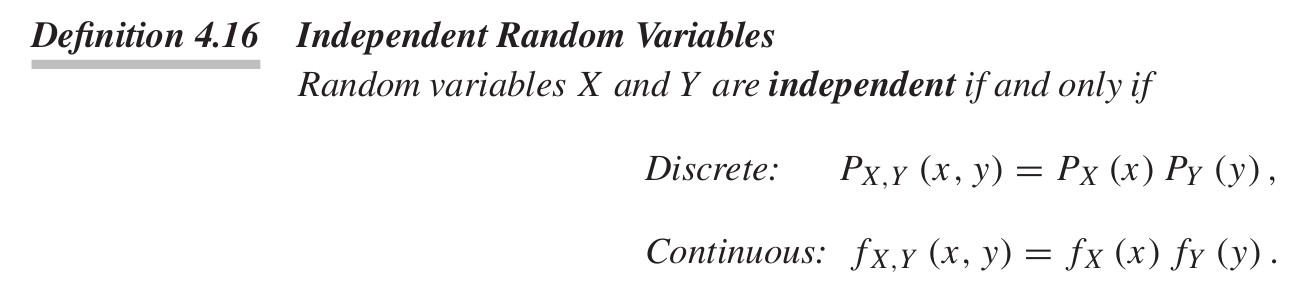

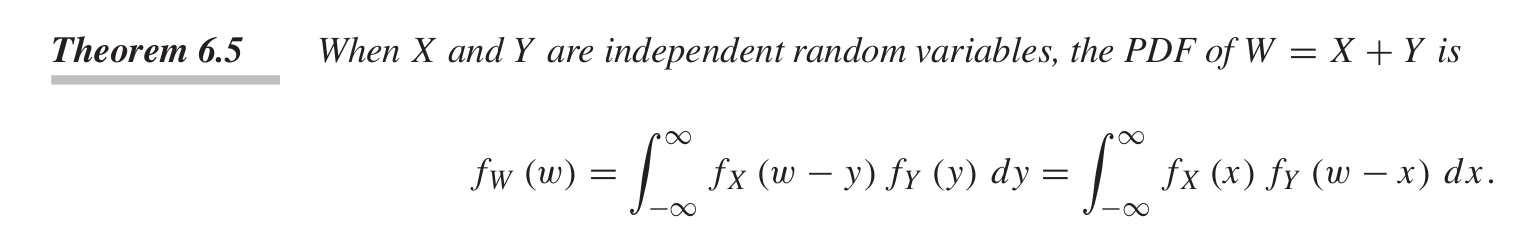
$$f_{X}(x) =  
\begin{cases} 
1 & \text{for } x \in [0,1] \\
0 & \text{otherwise}
\end{cases}$$
$$f_{Y}(y) =  
\begin{cases} 
1 & \text{for } y \in [0,1] \\
0 & \text{otherwise}
\end{cases}$$
$$W= X+Y $$

$$F_W(w) = P[W \leq w] = \iint\limits_{g(x,y) \leq w} f_{X,Y}(x,y) \, dx \, dy.
$$

$$=\iint\limits_{x+y \leq w} f_{X}(x)f_{Y}(y) \, dx \, dy. \iint\limits_{x+y \leq w}  \, dx \, dy.$$

In [59]:
# for 0<w<1
ans = integrate(1, (y, 0, w-x))
ans
integrate(ans, (x, 0, w))

w - x

w**2/2

In [68]:
#for 1<w<2
ans = integrate(1, (y, 1, w-x))
ans
simplify(integrate(ans, (x, w-1, 1)))

w - x - 1

-w**2/2 + 2*w - 2

In [69]:
ans = integrate(1, (y, w-x, 1))
ans
simplify(integrate(ans, (x, 1,w-1)))

-w + x + 1

-w**2/2 + 2*w - 2

##### ans = integrate(1, (x, w-y, 1))
ans
simplify(integrate(ans, (y, w-1,1)))